<a href="https://www.kaggle.com/code/sourabhgumtaj/bigmart-sales-data-eda?scriptVersionId=106020960" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:
Train=pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
Test=pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')
df=Train.copy()
df2=Test.copy()

In [3]:
#df=df1.append(df2) 

#df3=df.append(df1)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.info()
df.isnull().sum()
df['Item_Weight'] = df['Item_Weight'].replace(np.nan, 0)
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Unknown')
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].replace(np.nan, 0)
#>>>>>>>>>>>>>>>df['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)>>>>>>>>>>>MEAN OR MODE>>>>>>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* Check the Dtypes and NaN values.
* Replace the NaN values either with 0 or mean value.(Here we replaced with 0)

In [7]:
df.drop_duplicates(keep='first',inplace=True)
df.rename(columns={'Item_Identifier': 'Identifier', 'Item_Weight': 'Weight','Item_Fat_Content':'Fat_Content', 'Item_MRP': 'MRP', 'Outlet_Establishment_Year': 'Year', 'Outlet_Location_Type': 'Location', 'Item_Outlet_Sales': 'Sales'}, inplace=True)
df = df.replace(['low fat','reg','LF'],['Low Fat','Regular','Low Fat'])
df.tail(3)

,Identifier,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Outlet_Identifier,Year,Outlet_Size,Location,Outlet_Type,Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


* Drop the duplicate rows.
* Change the column names.
* Replace the similar names in the column.

<AxesSubplot:ylabel='Fat_Content'>

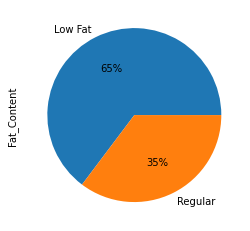

In [8]:
df.Fat_Content.value_counts(ascending = False).plot(kind='pie',autopct='%.f%%')

* Above graph shows that most of the product has Low Fat.

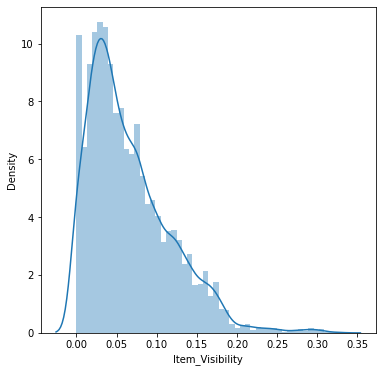

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

* Above graph shows the visibility of products

<AxesSubplot:>

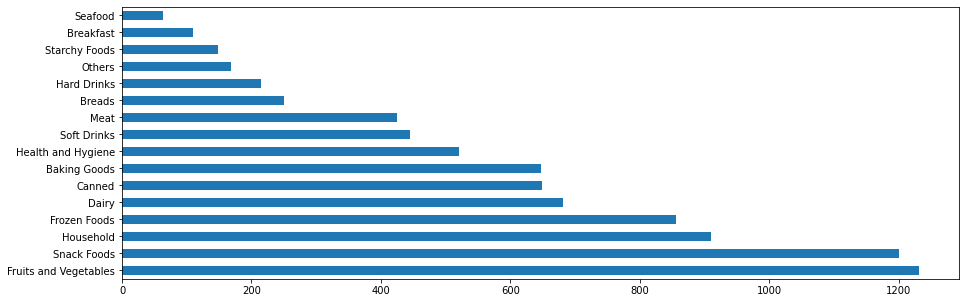

In [10]:
df.Item_Type.value_counts().plot(kind='barh', figsize=(15,5))

* Above graph shows that BigMart has maximum "Fruits and Vegetables" &"Snack Foods".

In [11]:
df

,Identifier,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Outlet_Identifier,Year,Outlet_Size,Location,Outlet_Type,Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='MRP', ylabel='Density'>

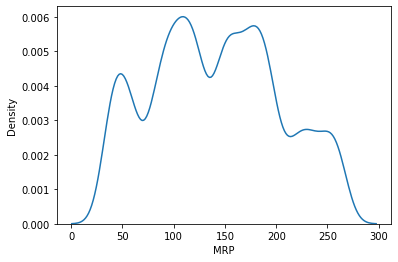

In [12]:
sns.kdeplot(df['MRP'])

<AxesSubplot:xlabel='MRP', ylabel='Count'>

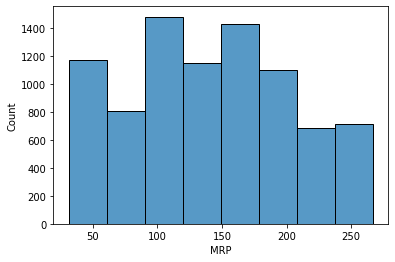

In [13]:
sns.histplot(df['MRP'],bins=8)

* From above graph we can say that, MRP of products is divided into 4 groups.
* Most of the product belongs to two groups(80-120) & (**150-180)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

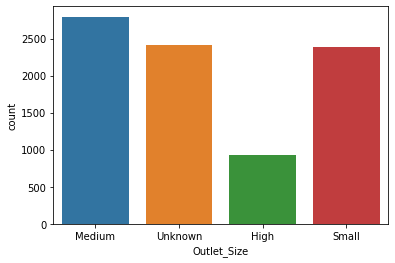

In [14]:
sns.countplot(x='Outlet_Size', data=df)

* Above graph shows that they have maximum 'Medium size outlets' and 'minimum High Size Outlets'.

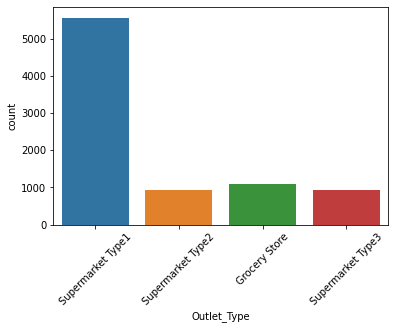

In [15]:
sns.countplot(x='Outlet_Type', data=df)
plt.xticks(rotation = 45)
plt.show()

* Above graph shows that they have maximum 'Type1 Supermarkets'.

<AxesSubplot:xlabel='MRP', ylabel='Item_Type'>

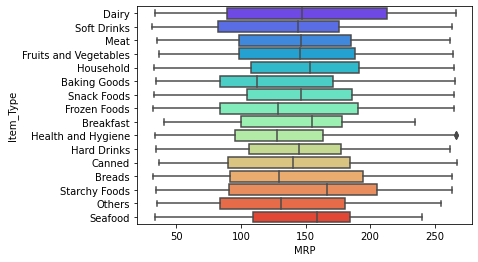

In [16]:
sns.boxplot(y="Item_Type", x="MRP", data=df, palette='rainbow')

* Above graph shows that most of product costs between 100-200.

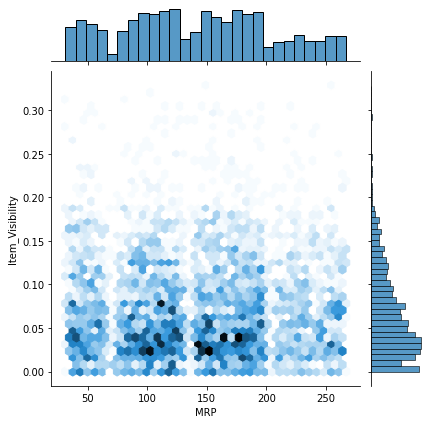

In [17]:
sns.jointplot(x='MRP', y='Item_Visibility', data=df, kind='hex')

* Above graph gives us 4 strips. 2nd & 3rd strip has more products in visible range.

<AxesSubplot:>

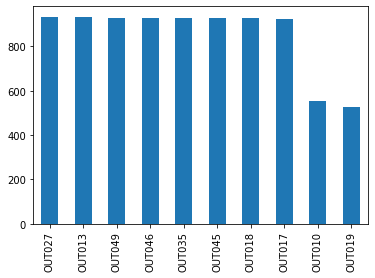

In [18]:
df.Outlet_Identifier.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Identifier'>

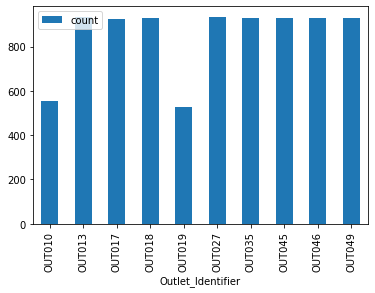

In [19]:
df.groupby('Outlet_Identifier')['MRP'].agg(['count']).plot(kind='bar')

<AxesSubplot:xlabel='Location', ylabel='Item_Type'>

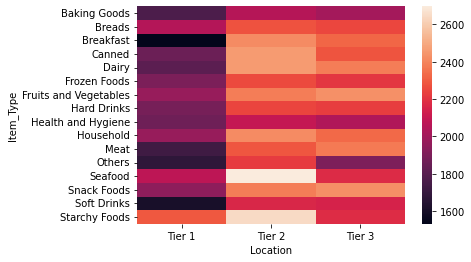

In [20]:
pvflights = df.pivot_table(values='Sales', index='Item_Type', columns='Location')
sns.heatmap(pvflights)

* We can say that Tier1 has maximum demand of Starchy Foods, tier 2 has maximum demand of seafoods and tier3 has maximum demand for snacks.

<AxesSubplot:xlabel='Outlet_Size'>

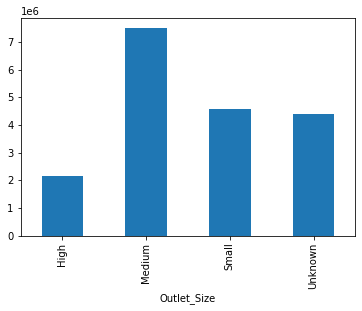

In [21]:
df.groupby('Outlet_Size')['Sales'].agg('sum').plot(kind='bar')

* Medium size outlets has maximum sales.

In [22]:
df

,Identifier,Weight,Fat_Content,Item_Visibility,Item_Type,MRP,Outlet_Identifier,Year,Outlet_Size,Location,Outlet_Type,Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:

a=df.Year==2002
b=df.Year==2004
c=df.Year==2009
d=df.Year==2007

aa=df.Year==1999
bb=df.Year==1998
cc=df.Year==1987
dd=df.Year==1985
ee=df.Year==1997

s=df[a|b|c|d|aa|cc|bb|dd|ee]
yy=s.groupby('Year')['Item_Type'].value_counts()




In [24]:
 pd.DataFrame(yy).loc[1985]
 ls=[]
for i in (df.Year.unique()):
    ls.append(i)
df[df['Year'].isin(ls)]
df.groupby('Year')['Item_Type'].value_counts(ascending = False)

Year  Item_Type            
1985  Fruits and Vegetables    213
      Snack Foods              212
      Household                151
      Frozen Foods             138
      Dairy                    116
                              ... 
2009  Hard Drinks               22
      Others                    20
      Starchy Foods             17
      Breakfast                 12
      Seafood                    7
Name: Item_Type, Length: 144, dtype: int64

<AxesSubplot:>

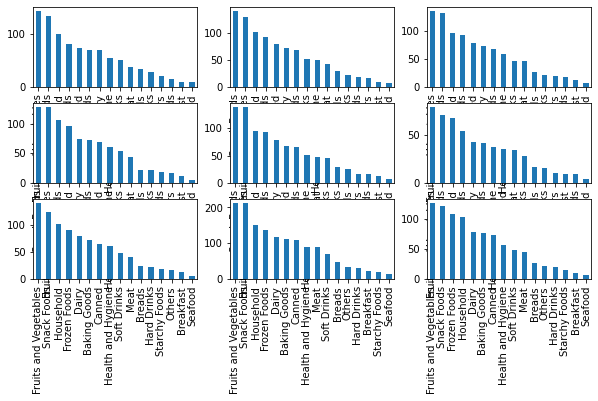

In [25]:
plt.subplot(3,3,1)
df[a]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,2)
df[b]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,3)
df[c]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,4)
df[d]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,5)
df[aa]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,6)
df[bb]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,7)
df[cc]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,8)
df[dd]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

plt.subplot(3,3,9)
df[ee]['Item_Type'].value_counts().plot(kind='bar',figsize=(10,5))

* Subplot shows the yearly top selling products.

<AxesSubplot:xlabel='Year'>

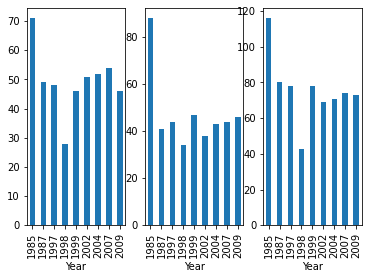

In [26]:
drink=df[df.Item_Type=='Soft Drinks']
meat=df[df.Item_Type=='Meat']
dairy=df[df.Item_Type=='Dairy']

plt.subplot(1,3,1)
drink.groupby('Year')['Item_Type'].count().plot(kind='bar')
plt.subplot(1,3,2)
meat.groupby('Year')['Item_Type'].count().plot(kind='bar')
plt.subplot(1,3,3)
dairy.groupby('Year')['Item_Type'].count().plot(kind='bar')


* Above graph shows the yearly sell of soft drinks, meat and dairy products. We noticed one thing that in year 1985 each graph has peak. 

Text(0, 0.5, 'Sales')

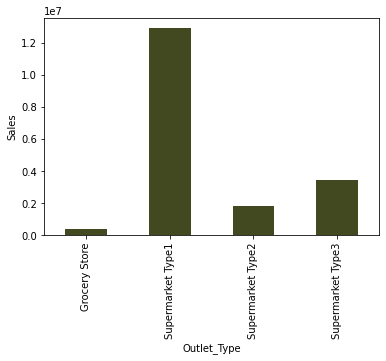

In [27]:
df.groupby('Outlet_Type')['Sales'].sum().plot(kind ='bar',color='#424921')
plt.ylabel('Sales')


* Supermarket type 1 has maximum sale and grocery store has lowest.